# 📊 Predicting Student Exam Performance
***

<p style="text-align: center;margin-left:150px">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uV31h9yCwNVDv5OLYSHvlA.png" alt="Machine Learning" style="width: 800px; height: 400px;">
</p>

## **1️⃣ Problem Statement**
The goal of this project is to develop a **machine learning model** that predicts whether a student will **pass or fail** their upcoming exam.  
We will use various academic, social, and behavioral factors as input features to understand key influences on student performance.

## **2️⃣ Data Overview**
The dataset consists of student records, including:  
- **Demographics:** Age, gender, living situation, financial status  
- **Academic Factors:** Previous exam scores, attendance, study habits  
- **Social & Psychological Factors:** Parental involvement, bullying, extracurricular activities  
- **Future Plans:** University aspirations, JAMB target scores  

## **3️⃣ Approach**
Our approach involves the following steps:
1. **Data Preprocessing:** encoding categorical variables, and feature selection  
3. **Model Training & Selection:** Comparing multiple ML algorithms (Logistic Regression, Random Forest, XGBoost, etc.)  
4. **Hyperparameter Tuning:** Optimizing the best-performing model  
5. **Model Evaluation:** Using accuracy, precision, recall, and F1-score  

## **4️⃣ Expected Outcome**
- A well-optimized model that predicts student performance with high accuracy  
- Insights into the most important factors affecting academic success
- Recommendations for intervention strategies to improve student outcomes  


In [3]:
#Load Data
import pandas as pd
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

student_df = pd.read_csv('../data/processed_survey_data.csv')
student_df.head()

,Student ID,Gender,Age Group,Living Situation,Parent Education Level,...,Free Time Activities,Language at Home,Involved in Work Outside School,Last Exam Performance,Foundational Knowledge
0,1001,Female,15 - 16,Both parents,Post-graduate education,...,Doing chores at home,Yoruba,Frequently,60% - 69%,Average
1,1002,Female,15 - 16,Both parents,Higher Education,...,Others,Yoruba,Occasionally,70% - 100%,Strong
2,1003,Male,15 - 16,Both parents,Post-graduate education,...,Playing sports,English,No,60% - 69%,Average
3,1004,Male,12 - 14,Both parents,Higher Education,...,"Studying,Socializing with friends,Watching mov...",English,No,70% - 100%,Average
4,1005,Male,15 - 16,Single parent,Higher Education,...,"Watching movies,Playing sports,Doing chores at...",English,No,60% - 69%,Strong


In [4]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Student ID                             100 non-null    int64 
 1   Gender                                 100 non-null    object
 2   Age Group                              100 non-null    object
 3   Living Situation                       100 non-null    object
 4   Parent Education Level                 100 non-null    object
 5   Family Financial Status                100 non-null    object
 6   Class                                  100 non-null    object
 7   Department                             100 non-null    object
 8   Performance in English                 100 non-null    object
 9   Performance in Maths                   100 non-null    object
 10  Performance in Biology                 100 non-null    object
 11  Performance in Physi

### **Handling Different Student Departments in Our Model** 📌  

In our dataset, students belong to **three different departments**:  
- **Science** 🧪 (Maths, Physics, Chemistry, Biology, etc.)  
- **Arts** 🎭 (Literature, Government, CRS, etc.)  
- **Commercial** 💼 (Commerce, Accounting, Economics, etc.)  

Since each department has its own set of subjects, we need a **single model that accommodates all departments** while ensuring that irrelevant subjects don’t interfere.  

### **Our Approach** 🤔  
✅ **Unified Model** – Instead of training three separate models, we will use **one model** that includes all subjects.  
✅ **Handling Unrelated Subjects** – If a subject is not relevant to a student’s department, we replace the value with `0`.  
✅ **Consistent Feature Space** – The model sees all subjects, but only the relevant ones carry meaningful values.  

### **How It Works** ⚙️  
1. **Replace “Nil” with `0`** in subject columns that don’t apply to a student's department.  
2. **Train a single Decision Tree model** that learns from all students while considering the `0` values appropriately.  
3. **Make predictions** based on the complete dataset, where the model understands which subjects contribute to performance.  

This approach ensures our model is **more flexible, scalable, and capable of handling mixed-department students effectively!** 🚀  


In [7]:
# Define subject groups based on department
science_subjects = ['Performance in English','Performance in Maths', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Biology']
arts_subjects = ['Performance in English','Performance in Maths','Performance in Lit in English', 'Performance in Government', 'Performance in CRS']
commercial_subjects = ['Performance in English','Performance in Maths','Performance in Commerce', 'Performance in Accounting', 'Performance in Economics']

In [8]:
# Defining common features (these apply to all students)
common_features = [
    "Gender",
    "Age Group",
    "Family Financial Status",
    "Study Hours per Week",
    "Extra Tutoring",
    "School Attendance",
    "Extracurricular Participation",
    "Experienced Bullying",
    "Stress About Schoolwork",
    "Confidence in Academic Ability",
    "Motivation for Attending School"
]

In [9]:
# Defining the target variable (what we are predicting)
target = "Last Exam Performance" 

Not all columns are relevant for the prediction. Defining columns to drop

In [11]:
dropping = [
    "Student ID", "Language at Home", "Free Time Activities", 
    "Reason To Dropout", "Type of Bullying", "Trusted Teacher", 
    "Involved in Work Outside School", "Extracurricular Participation", 
    "Extracurricular Hours", "Considered Dropping Out", 
    "Comfort in School Environment", "Home Learning Resources", 
    "School Learning Resources", "Plan to Attend University", 
    "JAMB Goal Score", "Parents Help with Homework", 
    "Parents Encourage Higher Education", "Stress About Schoolwork"
]

# Ensuring only existing columns are dropped
dropping = [col for col in dropping if col in student_df.columns]

# Drop them
student_df.drop(columns=dropping, inplace=True)

# Check remaining columns
print(student_df.columns.tolist())

['Gender', 'Age Group', 'Living Situation', 'Parent Education Level', 'Family Financial Status', 'Class', 'Department', 'Performance in English', 'Performance in Maths', 'Performance in Biology', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Study Hours per Week', 'Extra Tutoring', 'School Attendance', 'Experienced Bullying', 'Peer Pressure', 'Parents Attend Parent-Teacher Meeting', 'Confidence in Academic Ability', 'Access to Counseling', 'Motivation for Attending School', 'Last Exam Performance', 'Foundational Knowledge']


In [12]:
student_df.head()

,Gender,Age Group,Living Situation,Parent Education Level,Family Financial Status,...,Confidence in Academic Ability,Access to Counseling,Motivation for Attending School,Last Exam Performance,Foundational Knowledge
0,Female,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,...,Somewhat confident,I'm not sure,To learn and gain knowledge,60% - 69%,Average
1,Female,15 - 16,Both parents,Higher Education,We can afford some luxuries,...,Not confident,I'm not sure,To prepare for a good career,70% - 100%,Strong
2,Male,15 - 16,Both parents,Post-graduate education,We meet our needs but can't afford luxuries,...,Somewhat confident,Yes,To prepare for a good career,60% - 69%,Average
3,Male,12 - 14,Both parents,Higher Education,We can afford some luxuries,...,Very confident,Yes,To learn and gain knowledge,70% - 100%,Average
4,Male,15 - 16,Single parent,Higher Education,We are financially comfortable,...,Somewhat confident,No,To prepare for a good career,60% - 69%,Strong


In [13]:
for column in student_df.columns:
    unique_values = student_df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("-" * 50)

Column: Gender
['Female' 'Male']
--------------------------------------------------
Column: Age Group
['15 - 16' '12 - 14' '17 - 18']
--------------------------------------------------
Column: Living Situation
['Both parents' 'Single parent' 'Guardian']
--------------------------------------------------
Column: Parent Education Level
['Post-graduate education' 'Higher Education' 'Primary school'
 'Secondary school' 'No formal education']
--------------------------------------------------
Column: Family Financial Status
["We meet our needs but can't afford luxuries"
 'We can afford some luxuries' 'We are financially comfortable'
 'We struggle to meet basic needs']
--------------------------------------------------
Column: Class
['SS2' 'SS3' 'SS1']
--------------------------------------------------
Column: Department
['Science' 'Commercial' 'Humanities']
--------------------------------------------------
Column: Performance in English
['Excellent' 'Good' 'Fair']
-------------------------

In [14]:
# student_df.replace("Nil",0, inplace=True)

In [15]:
"""for column in student_df.columns:
    unique_values = student_df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("-" * 50)"""

'for column in student_df.columns:\n    unique_values = student_df[column].unique()\n    print(f"Column: {column}")\n    print(unique_values)\n    print("-" * 50)'

In [16]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 100 non-null    object
 1   Age Group                              100 non-null    object
 2   Living Situation                       100 non-null    object
 3   Parent Education Level                 100 non-null    object
 4   Family Financial Status                100 non-null    object
 5   Class                                  100 non-null    object
 6   Department                             100 non-null    object
 7   Performance in English                 100 non-null    object
 8   Performance in Maths                   100 non-null    object
 9   Performance in Biology                 100 non-null    object
 10  Performance in Physics                 100 non-null    object
 11  Performance in Chemi

In [17]:
print(student_df.isnull().sum())  # Checking missing values in each column

Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64


In [18]:
# Checking for missing values in key columns
print(student_df[['Performance in Physics', 'Department']].isnull().sum())

Performance in Physics    0
Department                0
dtype: int64


In [19]:
print(student_df.isnull().sum())  # Check for NaN
print(student_df.eq("").sum())    # Check for empty strings
print(student_df.eq(" ").sum())   # Check for spaces

Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64
Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level             0
Family Financial Status            0
                                  ..
Confidence in Academic Ability     0
Access to Counseling               0
Motivation for Attending School    0
Last Exam Performance              0
Foundational Knowledge             0
Length: 29, dtype: int64
Gender                             0
Age Group                          0
Living Situation                   0
Parent Education Level   

In [108]:
# Save student_df
file_name = '../data/processedNoAdd_ML_data.csv'
student_df.to_csv(file_name, index=False)

print(f"Data has been saved at {file_name}")

Data has been saved at ../data/processedNoAdd_ML_data.csv


### Training, Validation and Test Sets

In [111]:
# First split: 80% train, 20% temp (test + validation)
train_df, temp_df = train_test_split(student_df, test_size=0.2, random_state=42)

# Second split: 50% of temp goes to test, 50% to validation (10% each of total dataset)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Check shapes
print(f"Train shape: {train_df.shape}")  # (80, 29)
print(f"Validation shape: {val_df.shape}")  # (10, 29)
print(f"Test shape: {test_df.shape}")  # (10, 29)

Train shape: (80, 29)
Validation shape: (10, 29)
Test shape: (10, 29)


In [112]:
# Define the target variable
target_col = 'Last Exam Performance'

# Keep all columns except the target column
input_cols = [col for col in student_df.columns if col != target_col]

# Split into inputs and targets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Print results
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: []
Categorical Columns: ['Gender', 'Age Group', 'Living Situation', 'Parent Education Level', 'Family Financial Status', 'Class', 'Department', 'Performance in English', 'Performance in Maths', 'Performance in Biology', 'Performance in Physics', 'Performance in Chemistry', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Study Hours per Week', 'Extra Tutoring', 'School Attendance', 'Experienced Bullying', 'Peer Pressure', 'Parents Attend Parent-Teacher Meeting', 'Confidence in Academic Ability', 'Access to Counseling', 'Motivation for Attending School', 'Foundational Knowledge']


### Scaling Numeric Features  
There are no numeric features available for scaling in this dataset. Therefore, we will proceed with encoding categorical features.

### Encoding Categorical Data  
Since our dataset consists only of categorical variables, we will use One-Hot Encoding to transform them into a numerical format. We will also handle missing values by replacing them with 'Unknown' before encoding.

In [116]:
# Convert categorical columns to strings
train_inputs[categorical_cols] = train_inputs[categorical_cols].astype(str)
val_inputs[categorical_cols] = val_inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

# Transform the categorical columns
train_encoded = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=train_inputs.index)
val_encoded = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=val_inputs.index)
test_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols), index=test_inputs.index)

# Concatenate with the original dataset (dropping original categorical columns)
X_train = pd.concat([train_inputs.drop(columns=categorical_cols), train_encoded], axis=1)
X_val = pd.concat([val_inputs.drop(columns=categorical_cols), val_encoded], axis=1)
X_test = pd.concat([test_inputs.drop(columns=categorical_cols), test_encoded], axis=1)

# De-fragment the DataFrame to optimize memory usage
X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

In [117]:
X_train.head(2)

,Gender_Female,Gender_Male,Age Group_12 - 14,Age Group_15 - 16,Age Group_17 - 18,...,Motivation for Attending School_To meet family expectations,Motivation for Attending School_To prepare for a good career,Foundational Knowledge_Average,Foundational Knowledge_Strong,Foundational Knowledge_Weak
55,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0
88,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0


In [118]:
X_test.head(4)

,Gender_Female,Gender_Male,Age Group_12 - 14,Age Group_15 - 16,Age Group_17 - 18,...,Motivation for Attending School_To meet family expectations,Motivation for Attending School_To prepare for a good career,Foundational Knowledge_Average,Foundational Knowledge_Strong,Foundational Knowledge_Weak
33,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0
70,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0
0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0
31,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0


### Training and Visualizing Decision Trees

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
modelDes = DecisionTreeClassifier(random_state=42)

In [126]:
%%time
modelDes.fit(X_train, train_targets)

CPU times: total: 15.6 ms
Wall time: 16 ms


DecisionTreeClassifier(random_state=42)

#### Evaluation

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
train_preds = modelDes.predict(X_train)

In [133]:
train_preds

array(['70% - 100%', '70% - 100%', '60% - 69%', '60% - 69%', '70% - 100%',
       '70% - 100%', '70% - 100%', '70% - 100%', '70% - 100%',
       '70% - 100%', '60% - 69%', '70% - 100%', '60% - 69%', '60% - 69%',
       '70% - 100%', 'Below 40%', '70% - 100%', '60% - 69%', '70% - 100%',
       '70% - 100%', '70% - 100%', '60% - 69%', '60% - 69%', '60% - 69%',
       '60% - 69%', '70% - 100%', '40% - 59%', '60% - 69%', '70% - 100%',
       '60% - 69%', '70% - 100%', '70% - 100%', '60% - 69%', '60% - 69%',
       '70% - 100%', '60% - 69%', '60% - 69%', '60% - 69%', '70% - 100%',
       'Below 40%', '70% - 100%', '60% - 69%', '60% - 69%', '40% - 59%',
       '40% - 59%', '70% - 100%', '70% - 100%', '70% - 100%',
       '70% - 100%', '40% - 59%', '60% - 69%', '40% - 59%', '70% - 100%',
       '60% - 69%', '60% - 69%', '60% - 69%', '60% - 69%', '70% - 100%',
       '40% - 59%', '60% - 69%', '70% - 100%', '40% - 59%', '70% - 100%',
       '60% - 69%', '70% - 100%', '60% - 69%', '70% - 100%', 

In [135]:
pd.Series(train_preds).value_counts()

70% - 100%    36
60% - 69%     31
40% - 59%     10
Below 40%      3
Name: count, dtype: int64

The decision tree also returns probabilities for each prediction.

In [139]:
train_probs = modelDes.predict_proba(X_train)

In [141]:
train_probs

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],


In [143]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [146]:
modelDes.score(X_val, val_targets)

0.7

In [148]:
val_targets.value_counts() / len(val_targets)

Last Exam Performance
60% - 69%     0.5
70% - 100%    0.3
Below 40%     0.1
40% - 59%     0.1
Name: count, dtype: float64

visualizing the decision tree learned from the training data.

In [151]:
from sklearn.tree import plot_tree, export_text

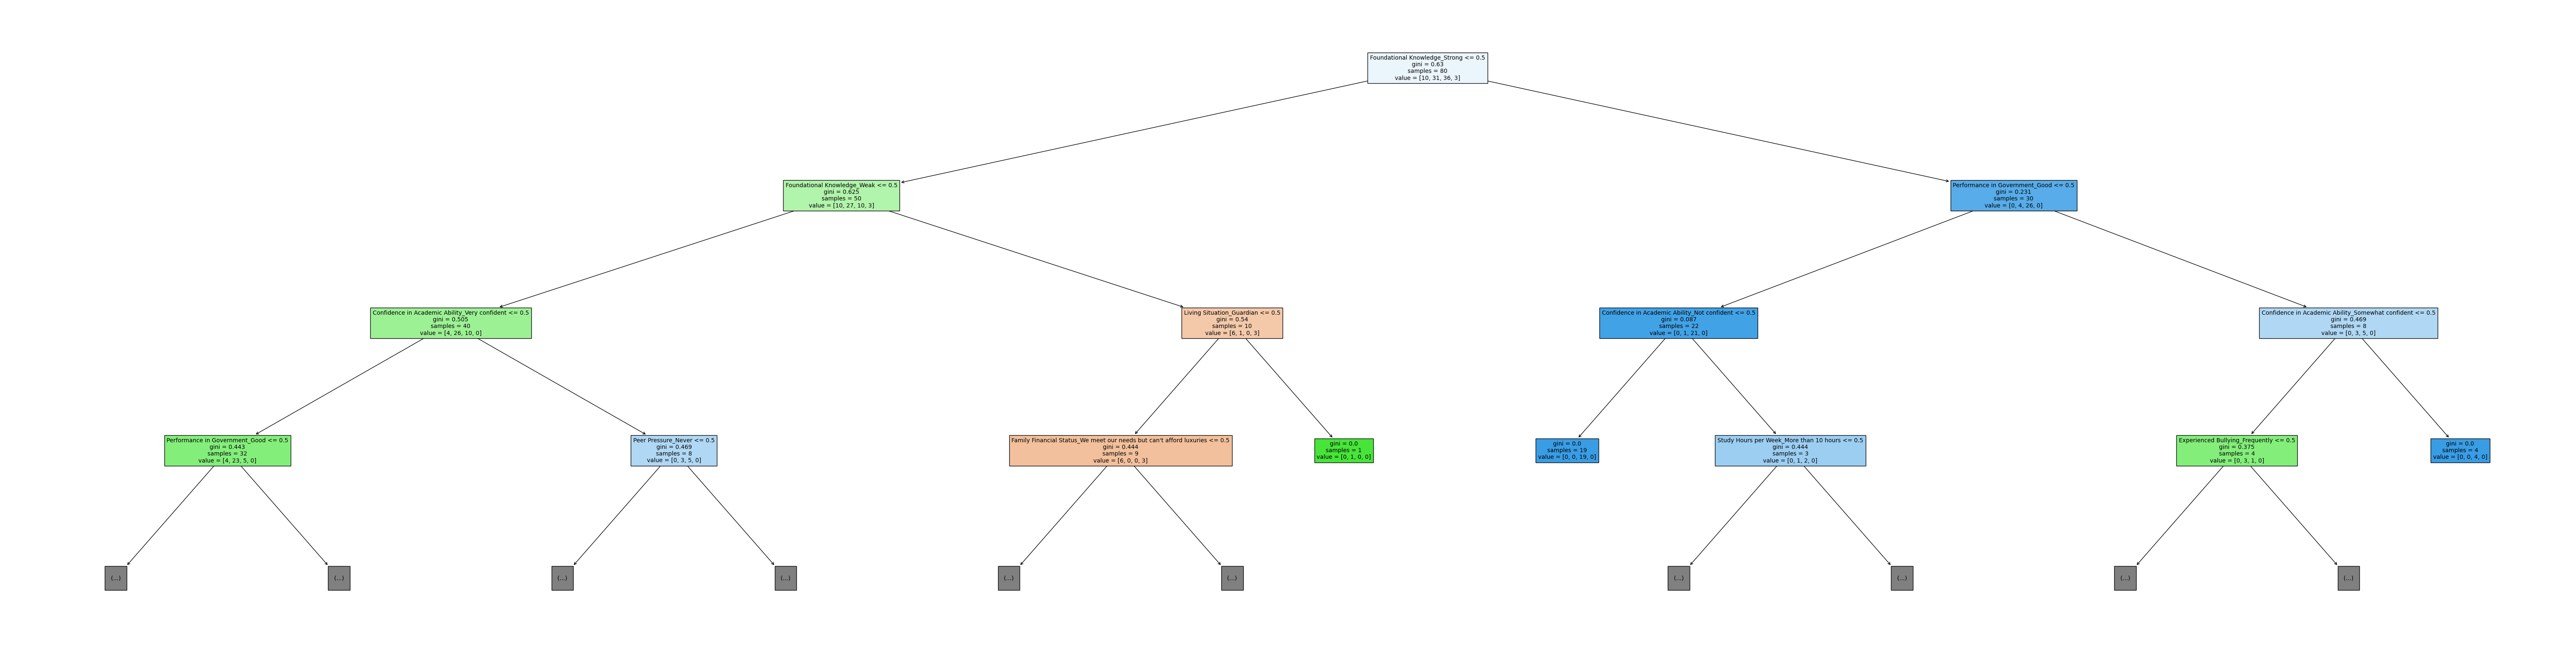

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(80,20))
plot_tree(modelDes, feature_names=X_train.columns, max_depth=3, filled=True);

In [154]:
modelDes.tree_.max_depth

9

Feature Importance

In [158]:
modelDes.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02776401, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01983143, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07932573, 0.01774391, 0.        , 0.02974715, 0.        ,
       0.        , 0.03139977, 0.        , 0.        , 0.        ,
       0.02974715, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06369345, 0.02974715, 0.        , 0.03580096, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02644191, 0.        , 0.        , 0.        , 0.     

In [160]:
X_train.columns

Index(['Gender_Female', 'Gender_Male', 'Age Group_12 - 14',
       'Age Group_15 - 16', 'Age Group_17 - 18',
       'Living Situation_Both parents', 'Living Situation_Guardian',
       'Living Situation_Single parent',
       'Parent Education Level_Higher Education',
       'Parent Education Level_No formal education',
       ...
       'Access to Counseling_No', 'Access to Counseling_Yes',
       'Motivation for Attending School_Others',
       'Motivation for Attending School_To avoid being bored at home',
       'Motivation for Attending School_To learn and gain knowledge',
       'Motivation for Attending School_To meet family expectations',
       'Motivation for Attending School_To prepare for a good career',
       'Foundational Knowledge_Average', 'Foundational Knowledge_Strong',
       'Foundational Knowledge_Weak'],
      dtype='object', length=101)

In [162]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modelDes.feature_importances_
}).sort_values('importance', ascending=False)

In [164]:
importance_df.head(10)

,feature,importance
99,Foundational Knowledge_Strong,0.242968
100,Foundational Knowledge_Weak,0.111849
25,Performance in English_Good,0.079326
50,Performance in Government_Good,0.063693
89,Confidence in Academic Ability_Very confident,0.044869
88,Confidence in Academic Ability_Somewhat confident,0.044621
82,Peer Pressure_Never,0.044621
53,Performance in CRS_Fair,0.035801
77,School Attendance_Occasionally,0.032391
31,Performance in Biology_Fair,0.031400


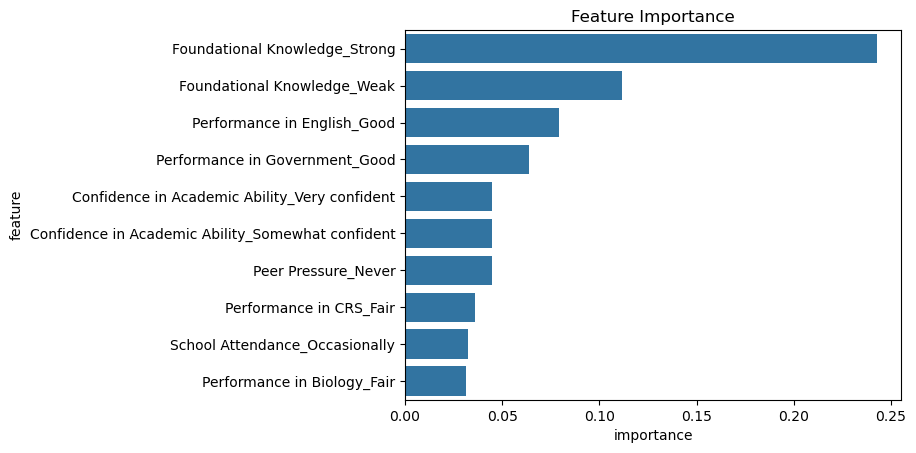

In [166]:
import seaborn as sns

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning and Overfitting

In [168]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [170]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [172]:
model.score(X_train, train_targets)

0.85

In [174]:
model.score(X_val, val_targets)

0.5

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [176]:
model.classes_

array(['40% - 59%', '60% - 69%', '70% - 100%', 'Below 40%'], dtype=object)

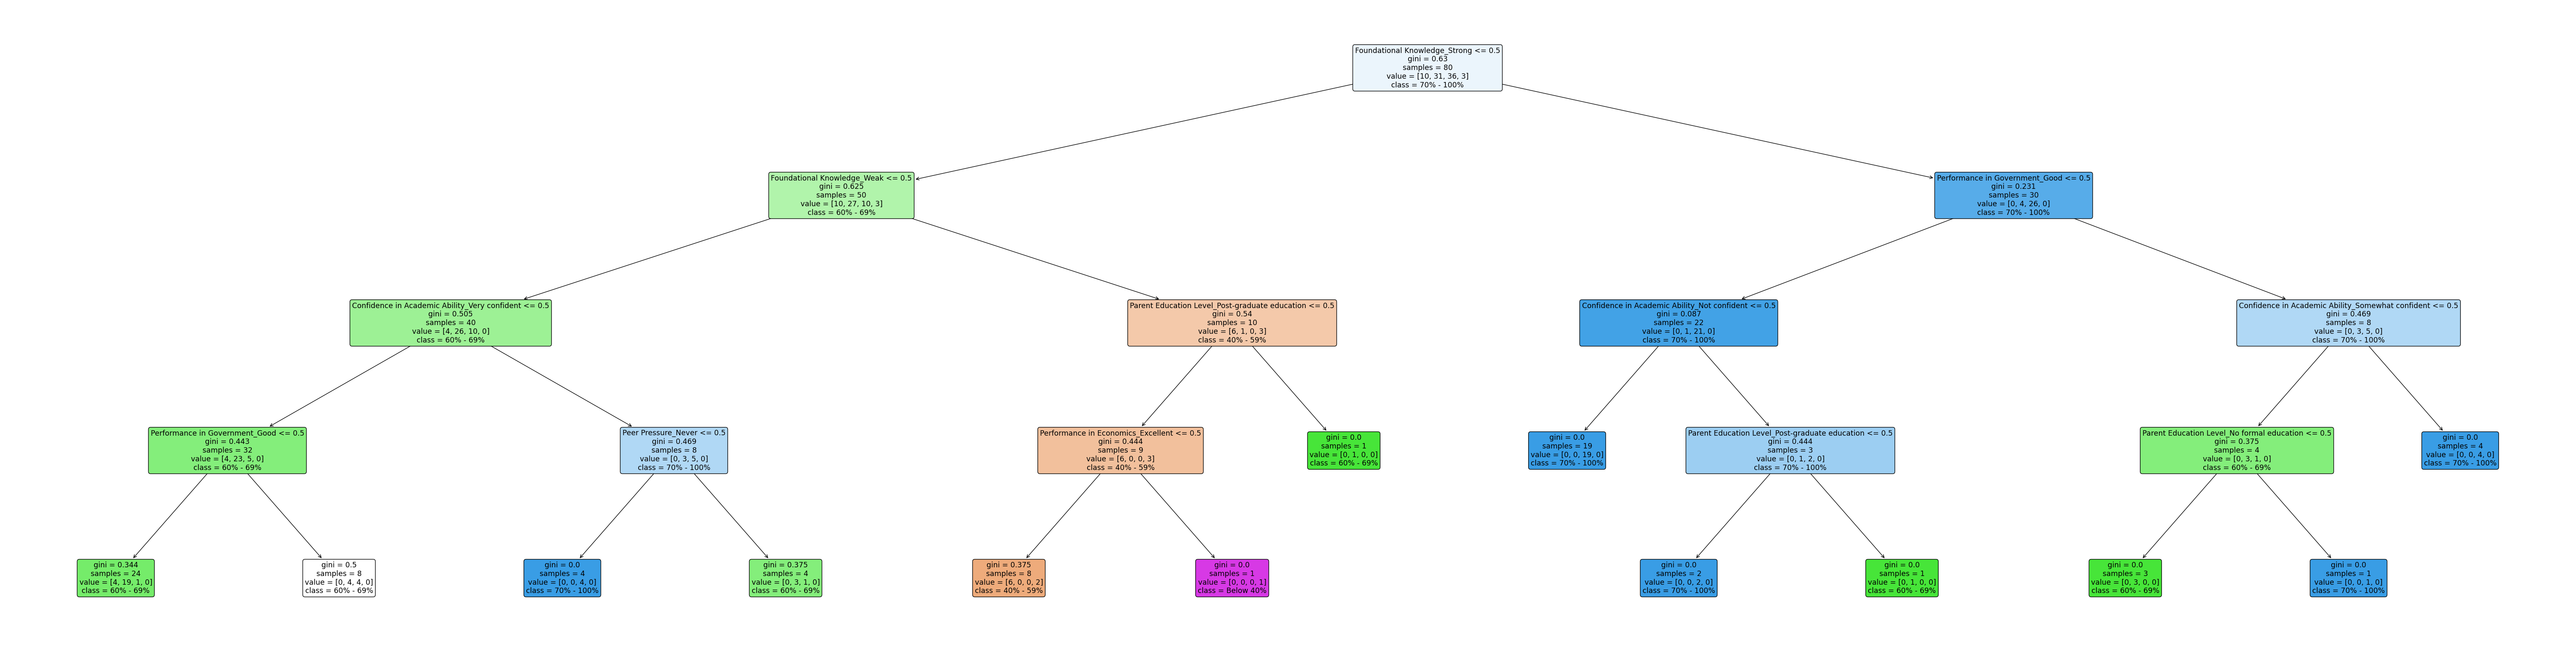

In [180]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

Experimenting with different depths using a helper function.

In [182]:
def max_depth_error(md): # Max Depth Value
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [184]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 312 ms
Wall time: 434 ms


In [186]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.3375,0.5
1,2,0.2750,0.4
2,3,0.2125,0.6
3,4,0.1500,0.5
4,5,0.0625,0.5
...,...,...,...
15,16,0.0000,0.3
16,17,0.0000,0.3
17,18,0.0000,0.3
18,19,0.0000,0.3


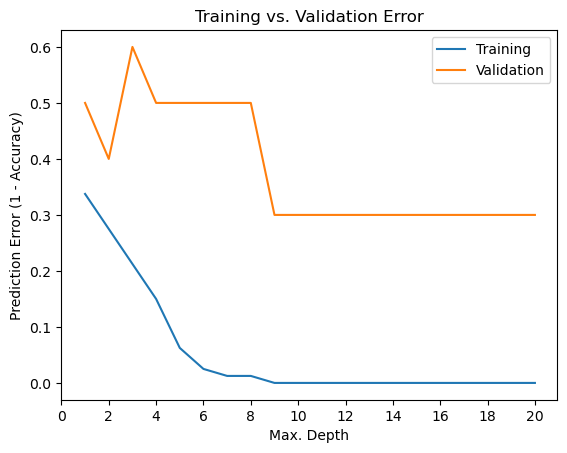

In [188]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

As max depth increases, the training error (blue line) approaches zero, indicating the model is memorizing the training data.

You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 4 or 2 results in the lowest validation error.

In [192]:
model = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.5

max_leaf_nodes

In [195]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
# Total number of leaf nodes is 128 (So it will try to make the best possible split)
# Making sure the best split has the lower GINI Coefficient

In [197]:
model.fit(X_train, train_targets)


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [199]:
model.score(X_train, train_targets)

1.0

In [201]:
model.score(X_val, val_targets)

0.4

In [203]:
model.tree_.max_depth

9

### Training a Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [210]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 516 ms
Wall time: 592 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [211]:
model.score(X_train, train_targets)

1.0

In [214]:
model.score(X_val, val_targets)

0.5

In [215]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.01, 0.07, 0.92, 0.  ],
       [0.01, 0.08, 0.91, 0.  ],
       [0.  , 0.98, 0.02, 0.  ],
       [0.12, 0.74, 0.11, 0.03],
       [0.05, 0.05, 0.87, 0.03],
       [0.06, 0.1 , 0.84, 0.  ],
       [0.02, 0.08, 0.89, 0.01],
       [0.17, 0.09, 0.73, 0.01],
       [0.02, 0.06, 0.92, 0.  ],
       [0.05, 0.1 , 0.85, 0.  ],
       [0.03, 0.66, 0.3 , 0.01],
       [0.02, 0.19, 0.76, 0.03],
       [0.08, 0.83, 0.09, 0.  ],
       [0.01, 0.91, 0.08, 0.  ],
       [0.05, 0.16, 0.79, 0.  ],
       [0.15, 0.05, 0.09, 0.71],
       [0.  , 0.17, 0.82, 0.01],
       [0.01, 0.93, 0.06, 0.  ],
       [0.01, 0.24, 0.75, 0.  ],
       [0.02, 0.07, 0.91, 0.  ],
       [0.02, 0.25, 0.73, 0.  ],
       [0.03, 0.79, 0.14, 0.04],
       [0.03, 0.9 , 0.07, 0.  ],
       [0.02, 0.8 , 0.18, 0.  ],
       [0.03, 0.86, 0.11, 0.  ],
       [0.01, 0.04, 0.95, 0.  ],
       [0.79, 0.03, 0.06, 0.12],
       [0.02, 0.95, 0.03, 0.  ],
       [0.02, 0.06, 0.91, 0.01],
       [0.02, 0.72, 0.26, 0.  ],
       [0.

In [217]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

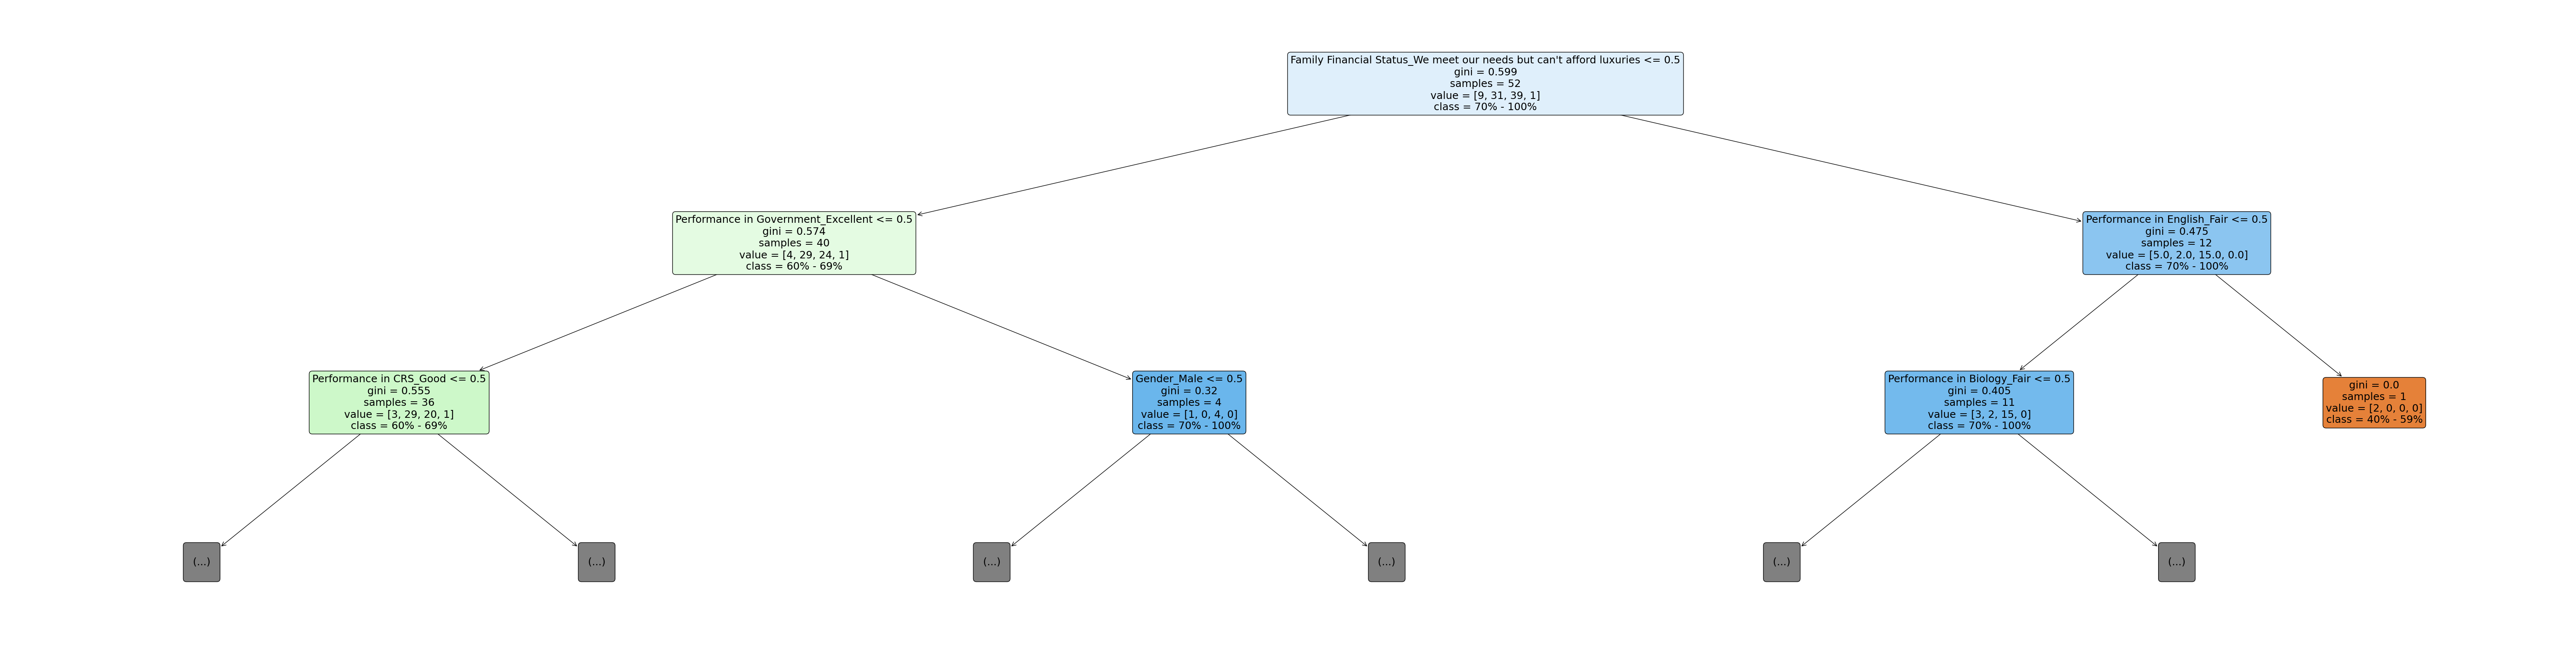

In [218]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

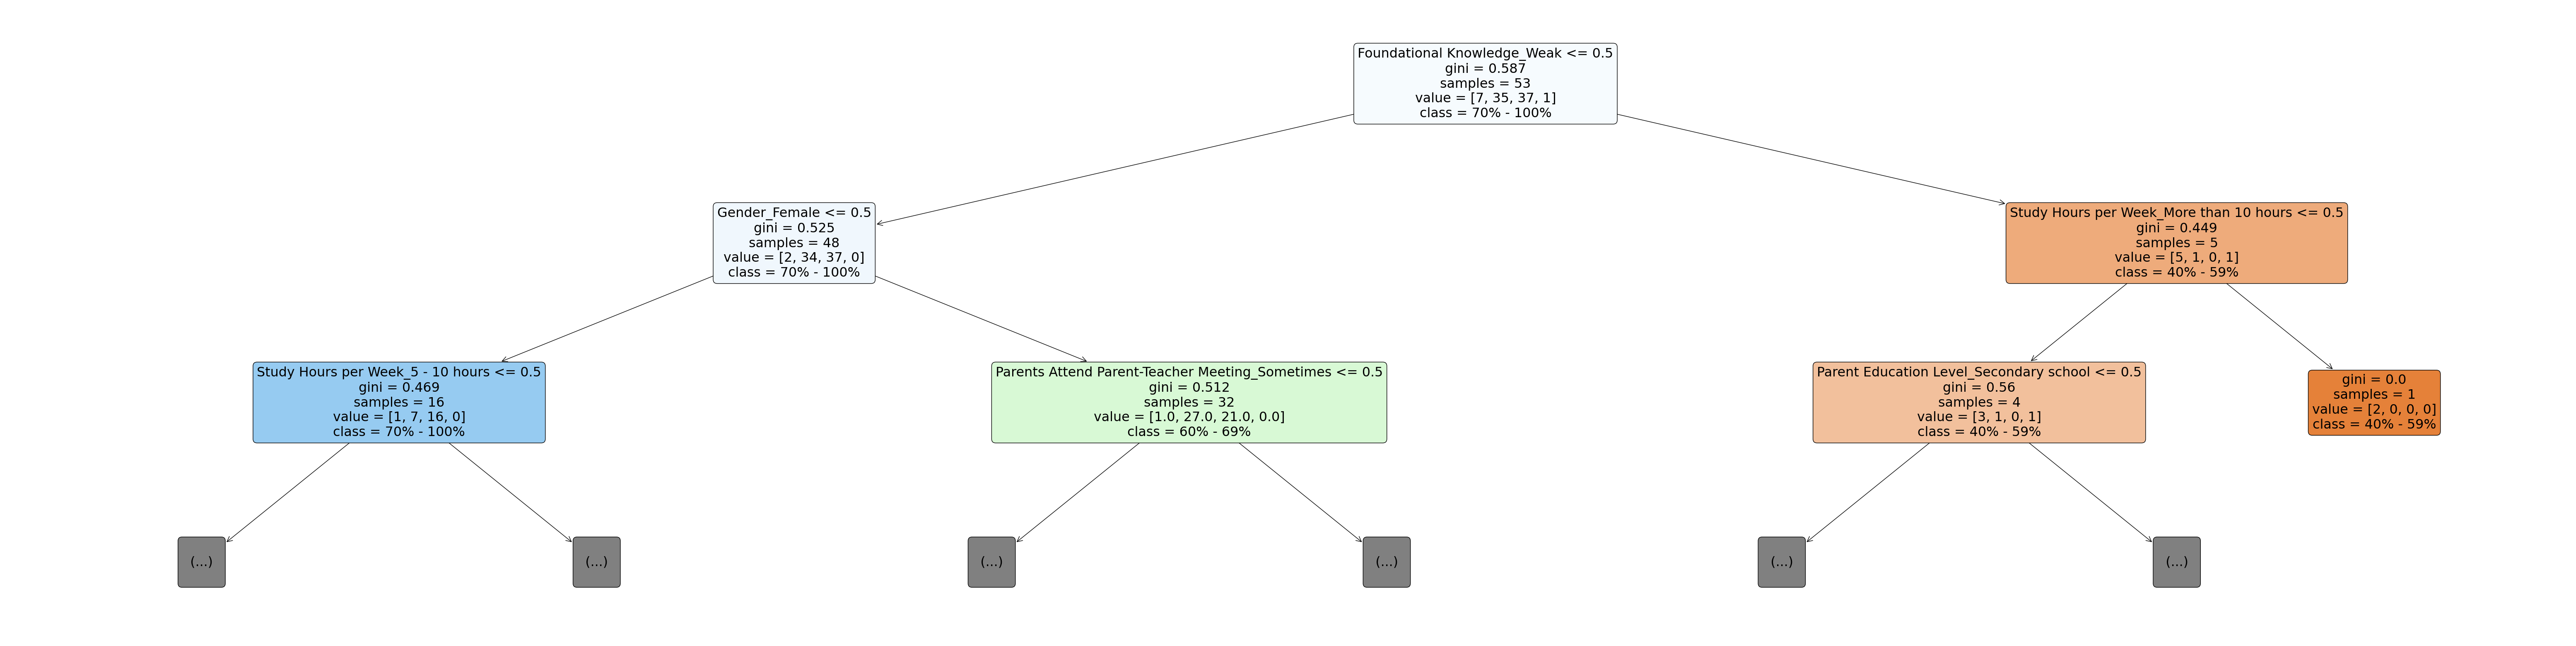

In [219]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [222]:
len(model.estimators_)

100

Assigning an "importance" to each feature, by combining the importance values from individual trees.

In [224]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [225]:
importance_df.head(10)

,feature,importance
99,Foundational Knowledge_Strong,0.081982
98,Foundational Knowledge_Average,0.056427
100,Foundational Knowledge_Weak,0.050668
26,Performance in Maths_Excellent,0.022634
10,Parent Education Level_Post-graduate education,0.020513
72,Extra Tutoring_No,0.020124
15,Family Financial Status_We meet our needs but ...,0.019379
12,Parent Education Level_Secondary school,0.018448
31,Performance in Biology_Fair,0.018255
88,Confidence in Academic Ability_Somewhat confident,0.017887


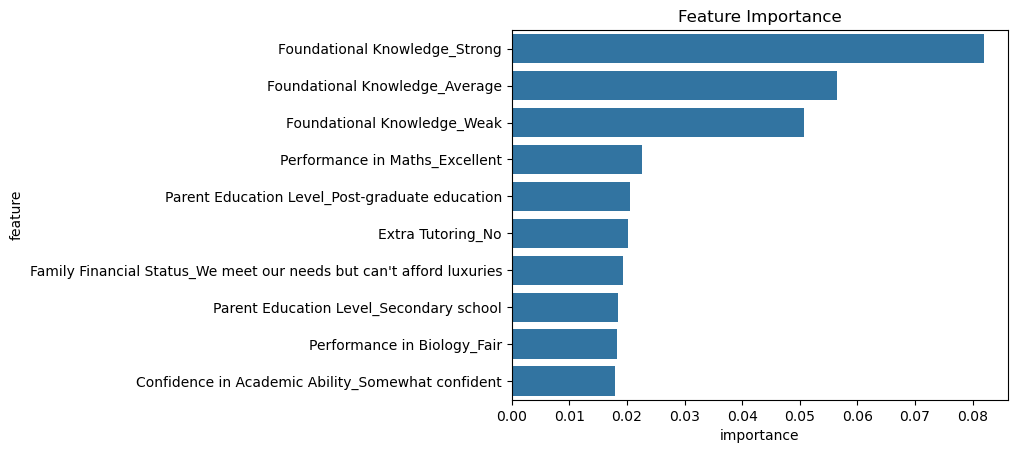

In [226]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with Random Forests

In [286]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [289]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [290]:

base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.5)

Using this as a benchmark for hyperparmeter tuning.

In [295]:
# n_estimators - 100 estimators

model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)

In [297]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [298]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(1.0, 0.5)

In [301]:
# test_params(max_depth=26)

In [303]:
base_accs 

(1.0, 0.5)

In [ ]:
test_params(max_features="sqrt")

In [ ]:
test_params(max_features=0.5)

In [ ]:
# min_samples_split and min_samples_leaf

test_params(min_samples_split=5, min_samples_leaf=3)

In [ ]:
test_params(min_samples_split=4, min_samples_leaf=10)

In [ ]:
test_params(min_samples_split=5, min_samples_leaf=2)

In [ ]:
test_params(min_samples_split=10, min_samples_leaf=2)

In [ ]:
# min_impurity_decrease
test_params(min_impurity_decrease=1e-7)


In [313]:
# class_weight

train_targets.value_counts()/len(train_targets) * 100

Last Exam Performance
70% - 100%    45.00
60% - 69%     38.75
40% - 59%     12.50
Below 40%      3.75
Name: count, dtype: float64

In [315]:
model.classes_

array(['40% - 59%', '60% - 69%', '70% - 100%', 'Below 40%'], dtype=object)

#### Putting it together

In [309]:
modelRan = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=100,
                               max_features="sqrt",
                               max_depth=26,
                               min_impurity_decrease= 0.0001)

In [319]:
modelRan.fit(X_train, train_targets)

RandomForestClassifier(max_depth=26, min_impurity_decrease=0.0001, n_jobs=-1,
                       random_state=42)

In [323]:
modelRan.score(X_train, train_targets), model.score(X_val, val_targets)

(1.0, 0.5)

In [325]:
y_train = train_targets  
y_val = val_targets      
y_test = test_targets   

### Making Predictions on New Inputs

In [328]:
def predict_input(modelDes, single_input, categorical_cols, encoder):
    # Convert input into DataFrame
    input_df = pd.DataFrame([single_input])

    # Ensure all columns exist in the input
    for col in categorical_cols:
        if col not in input_df:
            input_df[col] = None  # Set missing columns to None
    
    # One-Hot Encode categorical features
    input_encoded = pd.DataFrame(encoder.transform(input_df[categorical_cols]), 
                                 columns=encoder.get_feature_names_out(categorical_cols))
    
    # Make prediction
    pred = model.predict(input_encoded)[0]
    prob = model.predict_proba(input_encoded)[0][list(model.classes_).index(pred)]
    
    return pred, prob

In [351]:
# Define a new student's input (replace with actual values)
new_input = {
    'Gender': 'Female',
    'Age Group': '15 - 16',
    'Living Situation': 'Single parent',
    'Parent Education Level': 'Higher Education',
    'Family Financial Status': "We meet our needs but can't afford luxuries",
    'Class': 'SS2',
    'Department': 'Science',
    'Performance in English': 'Good',
    'Performance in Maths': 'Good',
    'Performance in Biology': 'Good',
    'Performance in Physics': 'Good',
    'Performance in Chemistry': 'Excellent',
    'Performance in Lit in English': "Nil",
    'Performance in Government':"Nil",
    'Performance in CRS': "Nil",
    'Performance in Commerce':"Nil" ,
    'Performance in Accounting': "Nil",
    'Performance in Economics': "Nil",
    'Study Hours per Week': 'More than 10 hours',
    'Extra Tutoring': 'Regularly',
    'School Attendance': 'Every day',
    'Experienced Bullying': 'Never',
    'Peer Pressure': 'Occasionally',
    'Parents Attend Parent-Teacher Meeting': 'Sometimes',
    'Confidence in Academic Ability': 'Very confident',
    'Access to Counseling': 'No',
    'Motivation for Attending School': 'To learn and gain knowledge',
    'Foundational Knowledge': 'Weak'
}

# Make prediction
prediction, probability = predict_input(model, new_input, categorical_cols, encoder)

print(f"Predicted Class: {prediction}")
print(f"Probability: {probability:.2f}")

Predicted Class: 40% - 59%
Probability: 0.39


### Saving and Loading Trained Models

In [337]:
import joblib

In [357]:
import joblib

# Save the trained Decision Tree model
joblib.dump(modelDes, "decision_tree_model.pkl")
print("Pkl Model saved successfully!")

Pkl Model saved successfully!


In [359]:
joblib.dump(model, "decision_tree_model.joblib")
print("Joblib Model saved successfully!")

Joblib Model saved successfully!


### Loading the Model Later

In [364]:
loaded_model = joblib.load("decision_tree_model.pkl")

new_input = {
    'Gender': 'Male',
    'Age Group': '15 - 16',
    'Living Situation': 'Single parent',
    'Parent Education Level': 'Higher Education',
    'Family Financial Status': "We meet our needs but can't afford luxuries",
    'Class': 'SS3',
    'Department': 'Science',
    'Performance in English': 'Good',
    'Performance in Maths': 'Good',
    'Performance in Biology': 'Good',
    'Performance in Physics': 'Good',
    'Performance in Chemistry': 'Excellent',
    'Performance in Lit in English': "Nil",
    'Performance in Government':"Nil",
    'Performance in CRS': "Nil",
    'Performance in Commerce':"Nil" ,
    'Performance in Accounting': "Nil",
    'Performance in Economics': "Nil",
    'Study Hours per Week': 'More than 10 hours',
    'Extra Tutoring': 'Regularly',
    'School Attendance': 'Every day',
    'Experienced Bullying': 'Never',
    'Peer Pressure': 'Occasionally',
    'Parents Attend Parent-Teacher Meeting': 'Sometimes',
    'Confidence in Academic Ability': 'Very confident',
    'Access to Counseling': 'Yes',
    'Motivation for Attending School': 'To learn and gain knowledge',
    'Foundational Knowledge': 'Strong'
}

# Test if it works
prediction, probability = predict_input(loaded_model, new_input, categorical_cols, encoder)
print(f"Predicted Class: {prediction}")
print(f"Probability: {probability:.2f}")

Predicted Class: 40% - 59%
Probability: 0.36
